In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plt
from skimage.transform import rotate, resize

from IPython.display import clear_output

%matplotlib inline

In [2]:
faces = fetch_olivetti_faces()

In [3]:
imgs = faces['images']

In [4]:
img = imgs[12]

In [5]:
rotated_img = rotate(img, 25)

In [6]:
center = np.array(rotated_img.shape)/2
new_size = 22 * 2
x0, x1 = int(center[0] - new_size/2), int(center[0] + new_size/2)
y0, y1 = int(center[1] - new_size/2), int(center[1] + new_size/2)
transformed_img = rotated_img[x0:x1, y0:y1]

In [7]:
def preprocess(img, angle):
    rotated_img = rotate(img, angle)
    center = np.array(rotated_img.shape)/2
    new_size = 22 * 2
    x0, x1 = int(center[0] - new_size/2), int(center[0] + new_size/2)
    y0, y1 = int(center[1] - new_size/2), int(center[1] + new_size/2)
    cropped_img = rotated_img[x0:x1, y0:y1]
    return resize(cropped_img, [28, 28])

In [18]:
transformed_img = preprocess(imgs[50], 90)

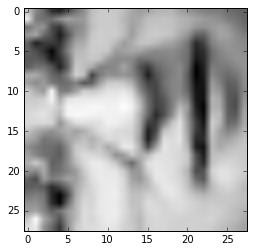

In [19]:
plt.imshow(1-transformed_img, cmap='Greys')

In [79]:
train = imgs[:300]
test = imgs[300:]

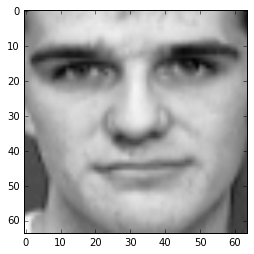

In [82]:
plt.imshow(1-train[-2], cmap='Greys')

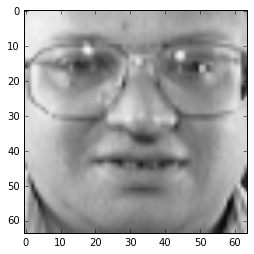

In [84]:
plt.imshow(1-test[1], cmap='Greys')

In [98]:
np.random.randint(180) - 90

-34

In [132]:
def construct_dataset(images, examples_per_image, state=241):
    np.random.seed(state)
    ind = 0
    examples = []
    labels = []
    for img in images:
        ind += 1
        if not (ind % 10):
            clear_output()
            print('Working on img', ind, '/', images.shape[0])
        for i in range(examples_per_image):
            angle = np.random.randint(180) - 90
            example = preprocess(img, angle)
            examples.append(example)
            labels.append(angle)
    return np.array(examples), np.array(labels)

In [146]:
x_te, y_te = construct_dataset(test, 10)

In [147]:
x_tr, y_tr = construct_dataset(train, 40)

In [141]:
from sklearn.utils import shuffle

In [148]:
x_tr, y_tr = shuffle(x_tr, y_tr, random_state=241)

In [149]:
x_te, y_te = shuffle(x_te, y_te, random_state=240)

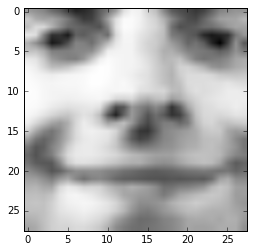

In [157]:
plt.imshow(1-x_tr[44], cmap='Greys')

In [154]:
y_tr[44]

0